In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
%matplotlib inline

# import data
df = pd.read_csv('fcc-forum-pageviews.csv', index_col='date')

In [ ]:
type(df)

In [2]:
# clean the data
df = df[df['value'] > df['value'].quantile(0.025)]
df = df[df['value'] < df['value'].quantile(.975)]
df

,value
date,
2016-05-19,19736
2016-05-26,18060
2016-05-27,19997
2016-05-28,19044
2016-05-29,20325
...,...
2019-11-24,138875
2019-11-29,171584
2019-11-30,141161


In [ ]:
# draw line plot
df.plot(y='value', title='Daily freeCodeCamp Forum Page Views 5/2016-12/2019', xlabel='Date', ylabel='Page Views')

In [3]:
# need to condense data to have sum all views in each month
df_bar = df.reset_index()
df_bar['date'] = pd.to_datetime(df_bar['date'], format='%Y-%m')
# df_bar = df_bar.drop('index', axis=1)

In [8]:
# start to creating table for bar chart
df_bar = df.reset_index()
df_bar['date'] = pd.to_datetime(df_bar['date'], format='%Y-%m')
df_bar = df_bar.groupby(pd.Grouper(key='date', freq='M')).sum()
df_bar

,value
date,
2016-05-31,97162
2016-06-30,415627
2016-07-31,675071
2016-08-31,962525
2016-09-30,1244306
2016-10-31,849348
2016-11-30,1213459
2016-12-31,862805
2017-01-31,1016340


In [30]:
months = {1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 6: 'June', 7: 'July', 8: 'August', 9: 'September', 10: 'October', 11: 'November', 12: 'December'}
df_bar = df.reset_index()
df_bar['date'] = pd.to_datetime(df_bar['date'], format='%Y-%m')
df_bar = df_bar.groupby(pd.Grouper(key='date', freq='M')).sum()
df_bar['year'] = df_bar.index.year
df_bar['month'] = df_bar.index.month
#df_bar['month'] = df_bar['month'].apply(lambda x: months[x])
df_bar = pd.pivot_table(df_bar, values='value', index=['year', 'month'])
# df_bar = df_bar.pivot(values='value', index=['year', 'month'], columns='value')
df_bar

value
year month         
2016 5        97162
     6       415627
     7       675071
     8       962525
     9      1244306
     10      849348
     11     1213459
     12      862805
2017 1      1016340
     2       871166
     3       910442
     4       926362
     5      1061573
     6      1307325
     7      2040012
     8      1479086
     9      1421304
     10     1470600
     11     1731047
     12     1501038
2018 1      1815983
     2      1839012
     3      1943507
     4      1870525
     5      1753449
     6      2103510
     7      1971323
     8      1947780
     9      1978252
     10     3296235
     11     2360650
     12     2481472
2019 1      3163752
     2      2967114
     3      2827649
     4      2681053
     5      2834637
     6      2532198
     7      2917097
     8      2978802
     9      2918065
     10     2701650
     11     2004330
     12      301467

In [26]:
df_bar.xs(key=1, level='month')

,value
year,
2017,1016340
2018,1815983
2019,3163752


In [14]:
df_bar['month'] = df_bar['month'].apply(lambda x: months[x])

KeyError: 'month'

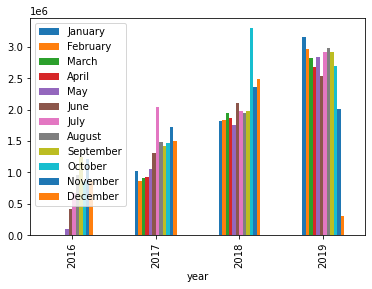

In [31]:
# still trying to figure this out, also trying to figure out if the above is correct for trying to accomplish what i need
# df_bar.plot(kind='bar', y='value', x='year')
df_bar.unstack().plot(kind='bar')
plt.legend(['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])